# APIs Modules - ein erste Blick auf "Requests"

Gezielt und automatisiert Daten im Web auslesen

Zuerst installieren wir pandas und requests. Das können wir von der Command line mit den Befehlen ```pip install requests``` und ```pip install pandas``` die beiden Module installieren. Oder direkt hier in Jupyter Notebook mit ```!pip install requests``` und ```!pip install pandas```.

### Unsere Imports

In [3]:
import requests
import pandas as pd
import calendar, datetime, time
import datetime as dt

Zur Dokumentation von requestst geht es [hier lang](http://docs.python-requests.org/en/master/).

### Notes

In einer ersten Übung arbeiten wir mit [der API des USGS](https://earthquake.usgs.gov/fdsnws/event/1/#methods) arbeiten. Für die meisten API muss man sich heutezutage eine eigene API-Key kreieren. Das werden wir zu einem späteren Zeitpunkt tun. Diese API braucht keine Keys. Deshalb ist es ein gutes Kennenlernbeispiel.

Falls Probleme mit dem Output auftauchen, hier ein Work around für die Meldung, dass der Output limitiert wurde. [Reconfigure line output](https://stackoverflow.com/questions/43288550/iopub-data-rate-exceeded-when-viewing-image-in-jupyter-notebook) and [opening stuff from the command line](https://stackoverflow.com/questions/16344709/how-to-open-a-file-from-the-command-line-with-a-specified-program)

### Dokumentation 

Bevor man mit deiner API arbeitet, lohnt es sich immer zuerst, die [Dokumentation](https://earthquake.usgs.gov/fdsnws/event/1/#parameters) anzuschauen. 

### Erste Abfragen

Kleinere Abfrage. Wieviele Erdbeben hat es in einem bestimmten Zeitraum gegeben?

In [4]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/count?starttime=2017-09-20&endtime=2017-09-21'

In [5]:
response = requests.get(url)

In [6]:
response

<Response [200]>

In [7]:
response.text

'339'

Wieviele hat es letzte Nacht von 22 bis 6 Uhr morgens gegeben? Dafür müssen wir in der Dokumentation Time nachfragen.

In [30]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/count?starttime=2017-09-20&endtime=2017-09-21

Wegen Zeitverschiebung Zeit anpassen.

In [33]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/count?starttime=2017-09-20T24:00:00&endtime=2017-09-21T08:00:00'

In [35]:
response = requests.get(url)
response.text

'31'

### Grosse, komibinierte Abfrage

Details zu allen Erbeben in den über drei Tage, 17-9-2017 bis 21-9-2017.

In [9]:
url1 = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson'

In [10]:
urlzeit = '&starttime=2017-09-17T24:00:00&endtime=2017-09-21T08:00:00'

In [11]:
url + urlzeit

'https://earthquake.usgs.gov/fdsnws/event/1/count?starttime=2017-09-20&endtime=2017-09-21&starttime=2017-09-17T24:00:00&endtime=2017-09-21T08:00:00'

In [12]:
response = requests.get(url1+urlzeit)
response.text

'{"type":"FeatureCollection","metadata":{"generated":1509531215000,"url":"https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2017-09-17T24:00:00&endtime=2017-09-21T08:00:00","title":"USGS Earthquakes","status":200,"api":"1.5.8","count":1111},"features":[{"type":"Feature","properties":{"mag":1.2,"place":"140km WNW of Haines Junction, Canada","time":1505980470681,"updated":1506448261339,"tz":-480,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/ak16874635","detail":"https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ak16874635&format=geojson","felt":null,"cdi":null,"mmi":null,"alert":null,"status":"reviewed","tsunami":0,"sig":22,"net":"ak","code":"16874635","ids":",ak16874635,","sources":",ak,","types":",geoserve,origin,phase-data,","nst":null,"dmin":null,"rms":0.45,"gap":null,"magType":"ml","type":"earthquake","title":"M 1.2 - 140km WNW of Haines Junction, Canada"},"geometry":{"type":"Point","coordinates":[-139.9567,61.1836,3.9]},"id":"ak16874635"},\

Alle Erbeben mit den ungefähren Koordinaten von Mexiko. [Hier könnte man die ungefähr nachschlagen.](http://www.latlong.net/)

In [14]:
urlloc = '&minlatitude=13&maxlatitude=33&minlongitude=-120&maxlongitude=-85'

In [15]:
url1+urlzeit+urlloc

'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2017-09-17T24:00:00&endtime=2017-09-21T08:00:00&minlatitude=13&maxlatitude=33&minlongitude=-120&maxlongitude=-85'

In [16]:
response = requests.get(url1+urlzeit+urlloc)
response.text

'{"type":"FeatureCollection","metadata":{"generated":1509531379000,"url":"https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2017-09-17T24:00:00&endtime=2017-09-21T08:00:00&minlatitude=13&maxlatitude=33&minlongitude=-120&maxlongitude=-85","title":"USGS Earthquakes","status":200,"api":"1.5.8","count":49},"features":[{"type":"Feature","properties":{"mag":4.2,"place":"45km SW of Pijijiapan, Mexico","time":1505956304020,"updated":1508715050040,"tz":-360,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us2000as9c","detail":"https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us2000as9c&format=geojson","felt":null,"cdi":null,"mmi":null,"alert":null,"status":"reviewed","tsunami":0,"sig":271,"net":"us","code":"2000as9c","ids":",us2000as9c,","sources":",us,","types":",geoserve,origin,phase-data,","nst":null,"dmin":1.91,"rms":0.66,"gap":190,"magType":"mb","type":"earthquake","title":"M 4.2 - 45km SW of Pijijiapan, Mexico"},"geometry":{"type":"Point","coordinat

Dieser Wulst lässt sich aber ziemlich schwer lesen. Deshalb müssen wir das zuerst umformatieren und dann verstehen, wie das ganze strukturiert ist. 

In [17]:
response.json()

{'bbox': [-117.0765, 14.5711, -0.2, -90.9075, 32.9196667, 178.93],
 'features': [{'geometry': {'coordinates': [-93.482, 15.3673, 35],
    'type': 'Point'},
   'id': 'us2000as9c',
   'properties': {'alert': None,
    'cdi': None,
    'code': '2000as9c',
    'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us2000as9c&format=geojson',
    'dmin': 1.91,
    'felt': None,
    'gap': 190,
    'ids': ',us2000as9c,',
    'mag': 4.2,
    'magType': 'mb',
    'mmi': None,
    'net': 'us',
    'nst': None,
    'place': '45km SW of Pijijiapan, Mexico',
    'rms': 0.66,
    'sig': 271,
    'sources': ',us,',
    'status': 'reviewed',
    'time': 1505956304020,
    'title': 'M 4.2 - 45km SW of Pijijiapan, Mexico',
    'tsunami': 0,
    'type': 'earthquake',
    'types': ',geoserve,origin,phase-data,',
    'tz': -360,
    'updated': 1508715050040,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us2000as9c'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-115.

In [18]:
dct = response.json()

Um sicher zu gehen, prüfen wir nochmals den Datentyp.

In [19]:
type(dct)

dict

In [20]:
len(dct)

4

Schauen wir uns alle keys und values an

In [25]:
for key in dct:
    print(key)

features
type
metadata
bbox


Features interessiert uns.

In [21]:
dct['features']

[{'geometry': {'coordinates': [-93.482, 15.3673, 35], 'type': 'Point'},
  'id': 'us2000as9c',
  'properties': {'alert': None,
   'cdi': None,
   'code': '2000as9c',
   'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us2000as9c&format=geojson',
   'dmin': 1.91,
   'felt': None,
   'gap': 190,
   'ids': ',us2000as9c,',
   'mag': 4.2,
   'magType': 'mb',
   'mmi': None,
   'net': 'us',
   'nst': None,
   'place': '45km SW of Pijijiapan, Mexico',
   'rms': 0.66,
   'sig': 271,
   'sources': ',us,',
   'status': 'reviewed',
   'time': 1505956304020,
   'title': 'M 4.2 - 45km SW of Pijijiapan, Mexico',
   'tsunami': 0,
   'type': 'earthquake',
   'types': ',geoserve,origin,phase-data,',
   'tz': -360,
   'updated': 1508715050040,
   'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us2000as9c'},
  'type': 'Feature'},
 {'geometry': {'coordinates': [-115.6006667, 32.8185, 11.77], 'type': 'Point'},
  'id': 'ci38007144',
  'properties': {'alert': None,
   'cdi': None,

In [21]:
type(dct['features'])

list

In [22]:
dct['features'][0]

{'geometry': {'coordinates': [-93.482, 15.3673, 35], 'type': 'Point'},
 'id': 'us2000as9c',
 'properties': {'alert': None,
  'cdi': None,
  'code': '2000as9c',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us2000as9c&format=geojson',
  'dmin': 1.91,
  'felt': None,
  'gap': 190,
  'ids': ',us2000as9c,',
  'mag': 4.2,
  'magType': 'mb',
  'mmi': None,
  'net': 'us',
  'nst': None,
  'place': '45km SW of Pijijiapan, Mexico',
  'rms': 0.66,
  'sig': 271,
  'sources': ',us,',
  'status': 'reviewed',
  'time': 1505956304020,
  'title': 'M 4.2 - 45km SW of Pijijiapan, Mexico',
  'tsunami': 0,
  'type': 'earthquake',
  'types': ',geoserve,origin,phase-data,',
  'tz': -360,
  'updated': 1508715050040,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us2000as9c'},
 'type': 'Feature'}

In [ ]:
dct['features'][0]

Schauen wir uns das erste Element an

In [23]:
for key in dct['features'][0]:
    print(key)

type
id
geometry
properties


In [24]:
dct['features'][0]['properties']

{'alert': None,
 'cdi': None,
 'code': '2000as9c',
 'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us2000as9c&format=geojson',
 'dmin': 1.91,
 'felt': None,
 'gap': 190,
 'ids': ',us2000as9c,',
 'mag': 4.2,
 'magType': 'mb',
 'mmi': None,
 'net': 'us',
 'nst': None,
 'place': '45km SW of Pijijiapan, Mexico',
 'rms': 0.66,
 'sig': 271,
 'sources': ',us,',
 'status': 'reviewed',
 'time': 1505956304020,
 'title': 'M 4.2 - 45km SW of Pijijiapan, Mexico',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,origin,phase-data,',
 'tz': -360,
 'updated': 1508715050040,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us2000as9c'}

Lesen wir folgendes aus:
1. Type
2. Magnitude
4. Örtlichkeit
5. Time 

In [25]:
earthquakes = []

for elem in dct['features']:
    
    t = elem['properties']['type']
    m = elem['properties']['mag']
    p = elem['properties']['place']
    tm = elem['properties']['time']
    
    mini_dict = {'Type': t,
                 'Mag': m,
                 'Place': p,
                 'Time': tm}
    
    earthquakes.append(mini_dict)

Dealing with Unix time

In [32]:
pd.DataFrame(earthquakes).to_csv('testfile.csv')

In [29]:
earthquakes = []

for elem in dct['features']:
    t = elem['properties']['type']
    m = elem['properties']['mag']
    p = elem['properties']['place']
    
    #Ints bearbeiten, die letzten drei Stellen abschneiden
    tm = str(elem['properties']['time'])[:-3]
        
    mini_dict = {'Type': t,
                 'Mag': m,
                 'Place': p,
                 'Time': tm}
    
    earthquakes.append(mini_dict)

In [30]:
pd.DataFrame(earthquakes)

[{'Mag': 4.2,
  'Place': '45km SW of Pijijiapan, Mexico',
  'Time': '1505956304',
  'Type': 'earthquake'},
 {'Mag': 2.26,
  'Place': '4km SW of Imperial, CA',
  'Time': '1505947525',
  'Type': 'earthquake'},
 {'Mag': 1,
  'Place': '7km NW of La Mesa, CA',
  'Time': '1505937649',
  'Type': 'quarry blast'},
 {'Mag': 2.71,
  'Place': '19km W of Delta, B.C., MX',
  'Time': '1505931747',
  'Type': 'earthquake'},
 {'Mag': 0.94,
  'Place': '27km SSW of Ocotillo Wells, CA',
  'Time': '1505922423',
  'Type': 'earthquake'},
 {'Mag': 4.1,
  'Place': '46km SSW of Salina Cruz, Mexico',
  'Time': '1505918247',
  'Type': 'earthquake'},
 {'Mag': 2.21,
  'Place': '7km N of Delta, B.C., MX',
  'Time': '1505911740',
  'Type': 'earthquake'},
 {'Mag': 3.9,
  'Place': '53km SSE of San Francisco del Mar, Mexico',
  'Time': '1505911495',
  'Type': 'earthquake'},
 {'Mag': 4.7,
  'Place': '53km SSW of Pijijiapan, Mexico',
  'Time': '1505903968',
  'Type': 'earthquake'},
 {'Mag': 4,
  'Place': '21km SSE of Salin

In [60]:
zahl = 12121323234234234324234

In [61]:
temp = datetime.datetime.fromtimestamp(1386181800).strftime('%Y-%m-%d %H:%M:%S')

In [62]:
temp

'2013-12-04 19:30:00'

In [63]:
str(zahl)

'12121323234234234324234'

In [64]:
dt(int(str(zahl)[:-3]))

TypeError: 'module' object is not callable

In [65]:
dt(int(str(zahl)[:-3])) 

TypeError: 'module' object is not callable

In [66]:
earthquakes

[{'Mag': 2.26,
  'Place': '4km SW of Imperial, CA',
  'Time': '1505947525',
  'Type': 'earthquake'},
 {'Mag': 1,
  'Place': '7km NW of La Mesa, CA',
  'Time': '1505937649',
  'Type': 'quarry blast'},
 {'Mag': 2.71,
  'Place': '19km W of Delta, B.C., MX',
  'Time': '1505931747',
  'Type': 'earthquake'},
 {'Mag': 0.94,
  'Place': '27km SSW of Ocotillo Wells, CA',
  'Time': '1505922423',
  'Type': 'earthquake'},
 {'Mag': 2.21,
  'Place': '7km N of Delta, B.C., MX',
  'Time': '1505911740',
  'Type': 'earthquake'},
 {'Mag': 4.7,
  'Place': '51km SSW of Pijijiapan, Mexico',
  'Time': '1505903968',
  'Type': 'earthquake'},
 {'Mag': 4.6,
  'Place': '15km ESE of San Mateo del Mar, Mexico',
  'Time': '1505878085',
  'Type': 'earthquake'},
 {'Mag': 4.9,
  'Place': '4km ESE of Acatenango, Guatemala',
  'Time': '1505875055',
  'Type': 'earthquake'},
 {'Mag': 4.6,
  'Place': '15km SW of San Dionisio del Mar, Mexico',
  'Time': '1505862694',
  'Type': 'earthquake'},
 {'Mag': 4.9,
  'Place': '101km S 

### Erste Erfahrung mit Pandas

In [33]:
pd.DataFrame(earthquakes)

,Mag,Place,Time,Type
0,4.20,"45km SW of Pijijiapan, Mexico",1505956304,earthquake
1,2.26,"4km SW of Imperial, CA",1505947525,earthquake
2,1.00,"7km NW of La Mesa, CA",1505937649,quarry blast
3,2.71,"19km W of Delta, B.C., MX",1505931747,earthquake
4,0.94,"27km SSW of Ocotillo Wells, CA",1505922423,earthquake
5,4.10,"46km SSW of Salina Cruz, Mexico",1505918247,earthquake
6,2.21,"7km N of Delta, B.C., MX",1505911740,earthquake
7,3.90,"53km SSE of San Francisco del Mar, Mexico",1505911495,earthquake
8,4.70,"53km SSW of Pijijiapan, Mexico",1505903968,earthquake
9,4.00,"21km SSE of Salina Cruz, Mexico",1505882957,earthquake


In [36]:
df = pd.DataFrame(earthquakes)

In [42]:
df.sort_values(by='Mag', ascending=True)

,Mag,Place,Time,Type
4,0.94,"27km SSW of Ocotillo Wells, CA",1505922423,earthquake
2,1.00,"7km NW of La Mesa, CA",1505937649,quarry blast
43,1.11,"4km WSW of Imperial, CA",1505716385,earthquake
24,1.34,"9km SSE of Brawley, CA",1505791878,earthquake
30,1.45,"4km WSW of Imperial, CA",1505769920,earthquake
21,1.67,"8km SSE of Brawley, CA",1505797300,earthquake
23,1.69,"8km SSE of Brawley, CA",1505792016,earthquake
31,1.71,"4km SW of Imperial, CA",1505769761,earthquake
28,1.73,"8km SSE of Brawley, CA",1505779842,earthquake
17,1.76,"8km SSE of Brawley, CA",1505810653,earthquake


Speichern wir das ab.

In [72]:
df.to_csv('erdbeben.csv')

In [44]:
df.head()

,Mag,Place,Time,Type
0,4.20,"45km SW of Pijijiapan, Mexico",1505956304,earthquake
1,2.26,"4km SW of Imperial, CA",1505947525,earthquake
2,1.00,"7km NW of La Mesa, CA",1505937649,quarry blast
3,2.71,"19km W of Delta, B.C., MX",1505931747,earthquake
4,0.94,"27km SSW of Ocotillo Wells, CA",1505922423,earthquake


In [64]:
temp = datetime.datetime.fromtimestamp('1505956304').strftime('%d-%m-%Y')

TypeError: a float is required

In [62]:
datetime.datetime.fromtimestamp(1505956304).strftime('%d-%m-%Y')

'21-09-2017'

In [59]:
temp

'21-09-2017'

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
Mag      49 non-null float64
Place    49 non-null object
Time     49 non-null object
Type     49 non-null object
dtypes: float64(1), object(3)
memory usage: 1.6+ KB


In [66]:
def unix_time(elem):
    elem = int(elem)
    elem = datetime.datetime.fromtimestamp(elem).strftime('%d-%m-%Y')
    return elem

In [67]:
df['Time'].apply(unix_time)

0     21-09-2017
1     21-09-2017
2     20-09-2017
3     20-09-2017
4     20-09-2017
5     20-09-2017
6     20-09-2017
7     20-09-2017
8     20-09-2017
9     20-09-2017
10    20-09-2017
11    20-09-2017
12    20-09-2017
13    20-09-2017
14    19-09-2017
15    19-09-2017
16    19-09-2017
17    19-09-2017
18    19-09-2017
19    19-09-2017
20    19-09-2017
21    19-09-2017
22    19-09-2017
23    19-09-2017
24    19-09-2017
25    19-09-2017
26    19-09-2017
27    19-09-2017
28    19-09-2017
29    19-09-2017
30    18-09-2017
31    18-09-2017
32    18-09-2017
33    18-09-2017
34    18-09-2017
35    18-09-2017
36    18-09-2017
37    18-09-2017
38    18-09-2017
39    18-09-2017
40    18-09-2017
41    18-09-2017
42    18-09-2017
43    18-09-2017
44    18-09-2017
45    18-09-2017
46    18-09-2017
47    18-09-2017
48    18-09-2017
Name: Time, dtype: object

In [69]:
df['Date'] = df['Time'].apply(unix_time)

In [72]:
def mexico(elem):
    if 'Mexico' in elem:
        return True
    else:
        return False

In [74]:
df['Mexico Check'] = df['Place'].apply(mexico)

In [76]:
df[df['Mexico Check'] == True]

,Mag,Place,Time,Type,Date,Mexico Check
0,4.2,"45km SW of Pijijiapan, Mexico",1505956304,earthquake,21-09-2017,True
5,4.1,"46km SSW of Salina Cruz, Mexico",1505918247,earthquake,20-09-2017,True
7,3.9,"53km SSE of San Francisco del Mar, Mexico",1505911495,earthquake,20-09-2017,True
8,4.7,"53km SSW of Pijijiapan, Mexico",1505903968,earthquake,20-09-2017,True
9,4.0,"21km SSE of Salina Cruz, Mexico",1505882957,earthquake,20-09-2017,True
10,4.5,"68km SSE of Salina Cruz, Mexico",1505880947,earthquake,20-09-2017,True
11,4.6,"19km SSE of Salina Cruz, Mexico",1505878082,earthquake,20-09-2017,True
13,4.6,"15km ENE of San Mateo del Mar, Mexico",1505862692,earthquake,20-09-2017,True
14,5.0,"108km SSE of San Mateo del Mar, Mexico",1505855595,earthquake,19-09-2017,True
15,4.4,"68km S of Salina Cruz, Mexico",1505846933,earthquake,19-09-2017,True


In [100]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline

In [94]:
print(plt.style.available)

['grayscale', 'seaborn-white', 'seaborn-paper', 'seaborn-deep', 'bmh', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-colorblind', 'seaborn', 'seaborn-talk', 'fivethirtyeight', 'seaborn-poster', 'dark_background', '_classic_test', 'seaborn-whitegrid', 'seaborn-bright', 'seaborn-ticks', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-notebook', 'classic', 'ggplot', 'seaborn-muted']


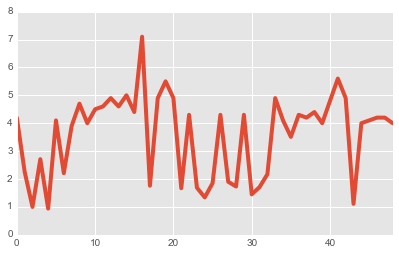

In [101]:
df['Mag'].plot()
plt.savefig('test.pdf')

In [80]:
('Gutgeheissene vs Abgewiesene Urteile 2007 - 2016.pdf', transparent=True, bbox_inches='tight')